In [77]:
# %matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
ach_data = np.load('colquhounData.npy')
np.shape(ach_data)

(24, 2)

In [22]:
time = ach_data[:,0]
time

array([  0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,
         5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,
         9.5,  10. ,  10.5,  11. ,  11.5,  12. ])

In [10]:
n_channel_closings = ach_data[:,1]
n_channel_closings

array([ 69.,  50.,  43.,  36.,  26.,  25.,  20.,  21.,  17.,  13.,   9.,
        15.,  12.,  11.,  11.,   3.,   5.,   3.,   4.,   4.,   3.,   1.,
         2.,   0.])

In [11]:
N = np.sum(n_channel_closings)
N

403.0

In [15]:
n_channel_open = np.hstack([[N],N - np.cumsum(n_channel_closings)])
n_channel_open

array([ 403.,  334.,  284.,  241.,  205.,  179.,  154.,  134.,  113.,
         96.,   83.,   74.,   59.,   47.,   36.,   25.,   22.,   17.,
         14.,   10.,    6.,    3.,    2.,    0.,    0.])

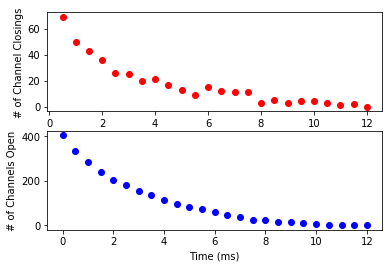

In [26]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(time, n_channel_closings, 'ro')
plt.ylabel("# of Channel Closings")
plt.subplot(2,1,2)
plt.plot(np.hstack([[0], time]),n_channel_open, 'bo')
plt.ylabel("# of Channels Open")
plt.xlabel("Time (ms)")

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


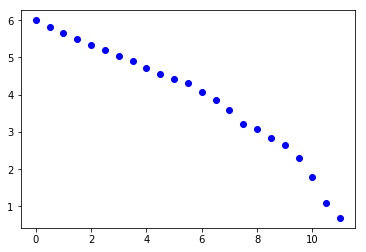

In [27]:
plt.figure()
plt.plot(np.hstack([[0], time]),np.log(n_channel_open), 'bo')

# Slope looks like it's around 1/3 = beta

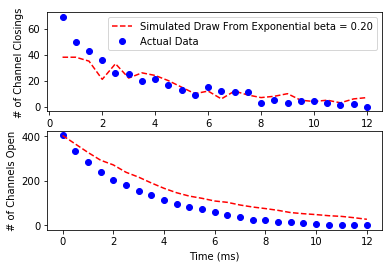

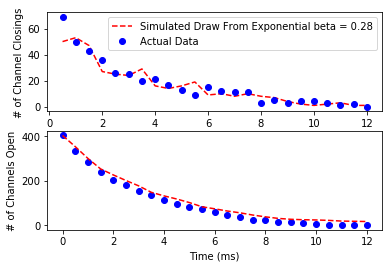

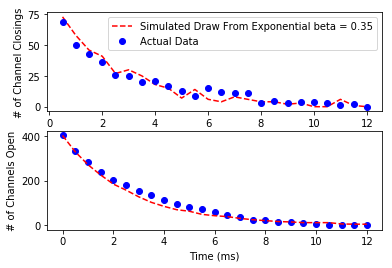

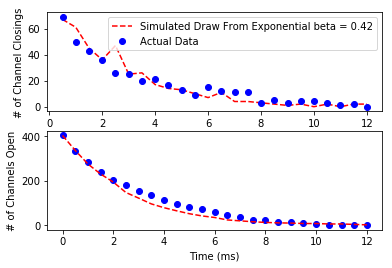

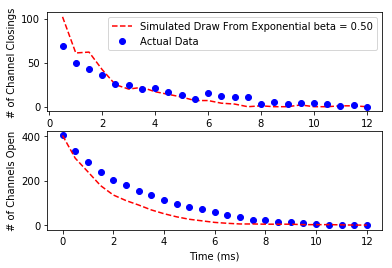

In [86]:
betas = np.linspace(.2, .5, 5)

for beta in betas:
    random_samples = np.random.exponential(1/beta, int (N))
    random_samples
    plt.figure()
    plt.subplot(2,1,1)
    p,q = np.histogram(random_samples, np.arange(0, 12.5, 0.5))
    plt.plot(time, p, 'r--')
    plt.plot(time, n_channel_closings, 'bo')
    plt.legend(['Simulated Draw From Exponential beta = %.2f' % beta, 'Actual Data'])

    plt.ylabel("# of Channel Closings")

    plt.subplot(2,1,2)
    plt.plot(np.hstack([[0], time]), n_channel_open, 'bo')
    plt.plot(np.hstack([[0], time]), np.hstack([[N],N - np.cumsum(p)]), 'r--')
    plt.xlabel("Time (ms)")
    plt.ylabel("# of Channels Open")

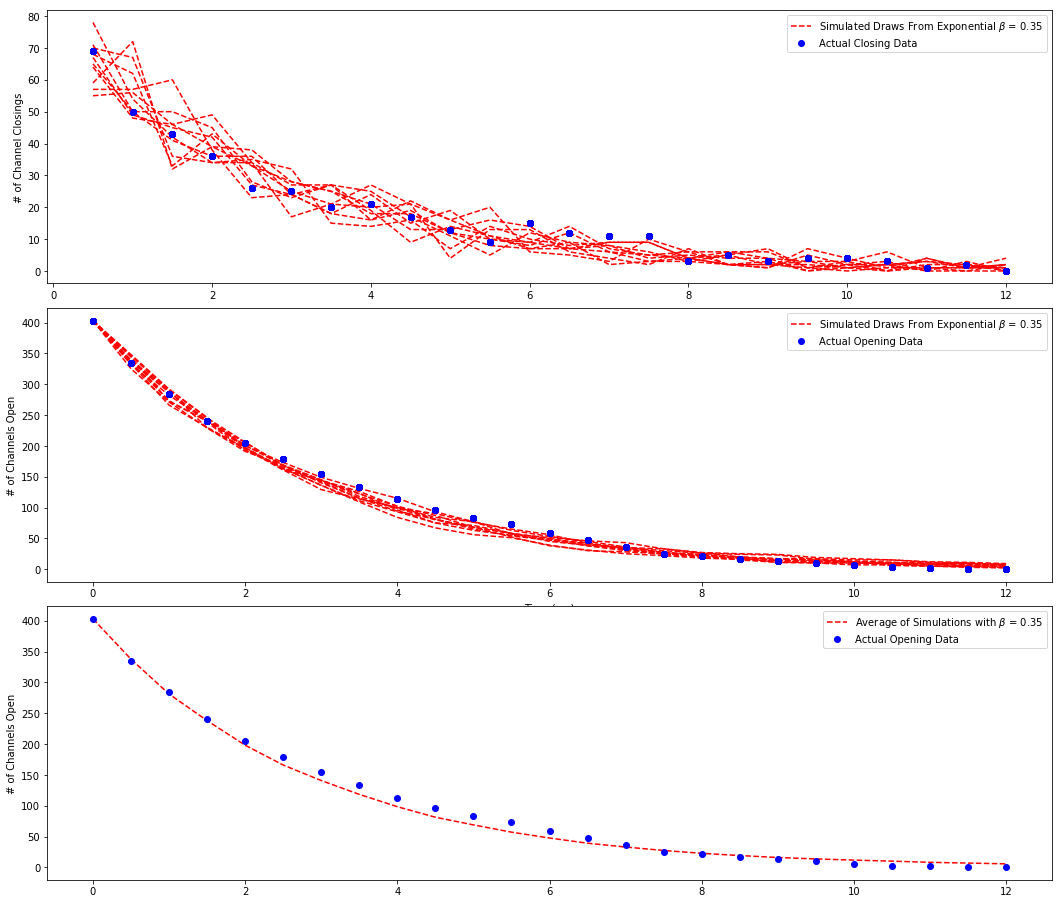

In [85]:
beta = 0.35000
avgs = np.ones((10,25))
plt.figure(figsize=(18, 16))
for i in range(10):
#     random_samples = np.random.exponential(1/beta, int (N))
    random_samples = -np.log(np.random.random(403))/beta
    plt.subplot(6,1,(1,2))
    p,q = np.histogram(random_samples, np.arange(0, 12.5, 0.5))
    plt.plot(time, p, 'r--')
    plt.plot(time, n_channel_closings, 'bo')
    plt.legend([r'Simulated Draws From Exponential $\beta$ = %.2f' % beta, 'Actual Closing Data'])

    plt.ylabel("# of Channel Closings")

    plt.subplot(6,1,(3,4))
    plt.plot(np.hstack([[0], time]), np.hstack([[N],N - np.cumsum(p)]), 'r--')
    plt.plot(np.hstack([[0], time]), n_channel_open, 'bo')
    plt.xlabel("Time (ms)")
    plt.ylabel("# of Channels Open")
    plt.legend([r'Simulated Draws From Exponential $\beta$ = %.2f' % beta, 'Actual Opening Data'])
    
    avgs[i, :] = np.hstack([[N],N - np.cumsum(p)])
    
plt.subplot(6,1,(5,6))
plt.plot(np.hstack([[0], time]), np.mean(avgs,0), 'r--')
plt.plot(np.hstack([[0], time]), n_channel_open, 'bo')
plt.ylabel("# of Channels Open")
plt.legend([r'Average of Simulations with $\beta$ = %.2f'% beta, "Actual Opening Data"])
plt.savefig("Simulation.png")